# Model Evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

## 1) Import Data

In [2]:
df_pipeline_metrics = pd.read_csv('../../Assets/Data/Evaluation/model_validation_data_metrics_30_01.csv', index_col=0)
df_pipeline_forecasts = pd.read_csv('../../Assets/Data/Evaluation/model_validation_data_forecasts_30_01.csv', index_col=0)

In [3]:
df_pipeline_forecasts[df_pipeline_forecasts.index == 13]

,y_val,y_pred_Diff_Eq_Last_Beta,y_pred_Diff_Eq_ML_Beta,y_pred_Sarima,y_pred_Ensemble,residuals_Diff_Eq_Last_Beta,residuals_Diff_Eq_ML_Beta,residuals_Sarima,residuals_Ensemble,dates_validation,idx
13,218.315813,332.977472,268.118473,198.409385,265.693429,25.960382,11.275749,-4.506986,10.726698,2021-04-29,0
13,90.763957,125.335948,107.969526,108.142687,116.739318,12.188800,6.066044,6.127095,9.157947,2021-04-29,1
13,113.565593,54.926533,48.287658,68.451086,61.688809,-13.720032,-15.273358,-10.555635,-12.137833,2021-04-29,2
13,1178.653004,495.523224,499.604435,379.728539,437.625882,-154.666438,-153.742417,-180.883347,-167.774892,2021-11-26,3
13,125.205637,233.874855,225.707257,119.673931,176.774393,38.312730,35.433138,-1.950274,18.181228,2021-11-26,4
13,167.295551,154.548509,150.186062,112.955026,133.751767,-2.982480,-4.003180,-12.714286,-7.848383,2021-11-26,5
13,52.370556,241.463688,209.172558,51.136559,146.300124,42.812306,35.501317,-0.279388,21.266459,2021-09-24,6
13,49.839137,79.011769,84.288125,53.265759,66.138764,10.285186,12.145434,1.208100,5.746643,2021-09-24,7
13,23.812141,122.746452,120.576249,81.722440,102.234446,23.148085,22.640313,13.549521,18.348803,2021-09-24,8
13,388.046894,298.753391,322.162691,260.217314,279.485352,-20.216814,-14.916748,-28.941712,-24.579263,2022-01-24,9


c:\users\nutzer\appdata\local\programs\python\python39\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
c:\users\nutzer\appdata\local\programs\python\python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


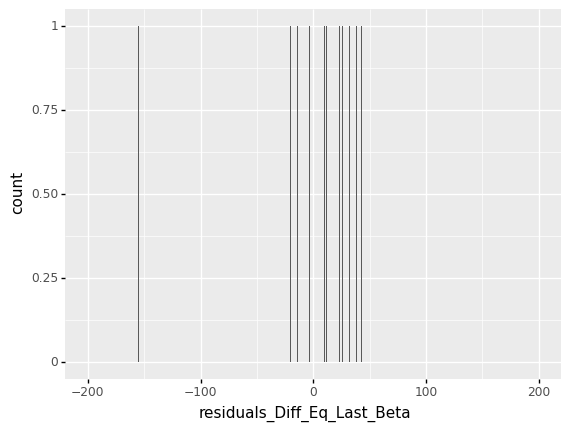

<ggplot: (112249077432)>

In [4]:
## Plot residuals:

# 14-day-residuals
df_residuals_day_14 = df_pipeline_forecasts[df_pipeline_forecasts.index == 13]

# Last Beta
ggplot(df_residuals_day_14, aes(x='residuals_Diff_Eq_Last_Beta')) + xlim(-200,200) + geom_histogram(binwidth=1)

# Plots Cross Validity

#### Load external model data

In [12]:
df_external_model = pd.read_csv('../../Assets/Data/Evaluation/Cross_Validity_Comparison_all_adapted.csv', index_col=0)
df_external_model

,Date,Real Incidences,SVEIUR_LB,SVEIUR_ML,ARIMA,Ensemble,Model_val
District,,,,,,,
Anhalt-Bitterfeld,11.01.2022,342.617013,359.438714,358.391580,340.462061,349.950387,304.205034
Anhalt-Bitterfeld,12.01.2022,268.162487,354.613762,351.961938,328.051165,341.332463,297.821756
Anhalt-Bitterfeld,13.01.2022,232.197166,349.813492,345.990139,304.871494,327.342493,291.770010
Anhalt-Bitterfeld,14.01.2022,255.543076,345.037316,340.255317,284.458257,314.747787,286.034873
Anhalt-Bitterfeld,15.01.2022,255.543076,340.285368,334.657619,273.365352,306.825360,280.602320
Anhalt-Bitterfeld,13.11.2021,311.068486,319.311980,315.900736,319.239999,319.275989,280.837225
Anhalt-Bitterfeld,14.11.2021,335.676337,330.643454,321.708373,329.450275,330.046864,293.300479
Anhalt-Bitterfeld,15.11.2021,345.140896,342.324586,328.864697,354.665411,348.494998,306.476634
Anhalt-Bitterfeld,16.11.2021,348.926719,354.361544,336.700457,347.003266,350.682405,320.412879


In [13]:
cur_distr = 'Anhalt-Bitterfeld'
df_district = df_external_model[df_external_model.index == cur_distr]
df_district

,Date,Real Incidences,SVEIUR_LB,SVEIUR_ML,ARIMA,Ensemble,Model_val
District,,,,,,,
Anhalt-Bitterfeld,11.01.2022,342.617013,359.438714,358.391580,340.462061,349.950387,304.205034
Anhalt-Bitterfeld,12.01.2022,268.162487,354.613762,351.961938,328.051165,341.332463,297.821756
Anhalt-Bitterfeld,13.01.2022,232.197166,349.813492,345.990139,304.871494,327.342493,291.770010
Anhalt-Bitterfeld,14.01.2022,255.543076,345.037316,340.255317,284.458257,314.747787,286.034873
Anhalt-Bitterfeld,15.01.2022,255.543076,340.285368,334.657619,273.365352,306.825360,280.602320
Anhalt-Bitterfeld,13.11.2021,311.068486,319.311980,315.900736,319.239999,319.275989,280.837225
Anhalt-Bitterfeld,14.11.2021,335.676337,330.643454,321.708373,329.450275,330.046864,293.300479
Anhalt-Bitterfeld,15.11.2021,345.140896,342.324586,328.864697,354.665411,348.494998,306.476634
Anhalt-Bitterfeld,16.11.2021,348.926719,354.361544,336.700457,347.003266,350.682405,320.412879


### Transform dataframe

In [14]:
df_v4 = abs(df_district[['SVEIUR_LB','SVEIUR_ML', 'ARIMA', 'Ensemble', 'Model_val']].multiply(1/df_district['Real Incidences'], axis='index')-1)
df_v4['Dates'] = df_district['Date']
df_v4

,SVEIUR_LB,SVEIUR_ML,ARIMA,Ensemble,Model_val,Dates
District,,,,,,
Anhalt-Bitterfeld,0.049098,0.046041,0.006290,0.021404,0.112113,11.01.2022
Anhalt-Bitterfeld,0.322384,0.312495,0.223330,0.272857,0.110602,12.01.2022
Anhalt-Bitterfeld,0.506536,0.490070,0.312985,0.409761,0.256561,13.01.2022
Anhalt-Bitterfeld,0.350212,0.331499,0.113152,0.231682,0.119322,14.01.2022
Anhalt-Bitterfeld,0.331616,0.309594,0.069743,0.200680,0.098063,15.01.2022
Anhalt-Bitterfeld,0.026501,0.015534,0.026269,0.026385,0.097185,13.11.2021
Anhalt-Bitterfeld,0.014993,0.041611,0.018548,0.016771,0.126240,14.11.2021
Anhalt-Bitterfeld,0.008160,0.047158,0.027596,0.009718,0.112025,15.11.2021
Anhalt-Bitterfeld,0.015576,0.035040,0.005512,0.005032,0.081719,16.11.2021


#### Create MAPE for each time interval

In [15]:
sum_df_dates = pd.DataFrame()
dates = []
for j in range(4):
    i = (j+1)*4+j+1
    k = i-5
    dates.append(df_v4.iloc[i-1]['Dates'])
    sum_df_dates[j] = df_v4.iloc[k:i].sum()
sum_df = sum_df_dates.iloc[:-1 , :]
sum_df = sum_df/5
sum_df_tp = sum_df.transpose()
sum_dates_df = sum_df_tp.assign(Dates = dates)
sum_dates_df

,SVEIUR_LB,SVEIUR_ML,ARIMA,Ensemble,Model_val,Dates
0,0.311969,0.29794,0.1451,0.227277,0.139332,15.01.2022
1,0.014323,0.040977,0.021027,0.01494,0.101833,17.11.2021
2,0.114762,0.050916,0.065489,0.041648,0.248156,20.04.2021
3,0.479878,0.33764,0.075326,0.221314,0.453461,15.09.2021


### Plot cross validity per district and per interval- MAPE

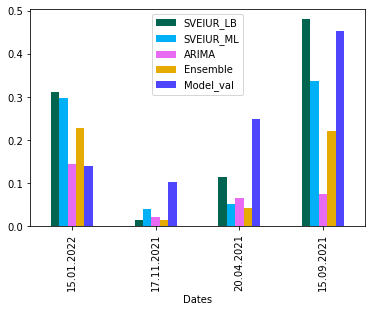

In [16]:
colors = ('#006450', '#00B0F6', '#E76BF3', '#E6AB02', '#4E45FD')
sum_dates_df.plot(x='Dates', kind='bar', color=colors)
plt.savefig(f'{cur_distr}.png')

In [17]:
date1 = df_district.iloc[0:5]
date2 = df_district.iloc[5:10]
date3 = df_district.iloc[10:15]
date4 = df_district.iloc[15:20]
date1, date2, date3, date4

(                         Date  Real Incidences   SVEIUR_LB   SVEIUR_ML  \
 District                                                                 
 Anhalt-Bitterfeld  11.01.2022       342.617013  359.438714  358.391580   
 Anhalt-Bitterfeld  12.01.2022       268.162487  354.613762  351.961938   
 Anhalt-Bitterfeld  13.01.2022       232.197166  349.813492  345.990139   
 Anhalt-Bitterfeld  14.01.2022       255.543076  345.037316  340.255317   
 Anhalt-Bitterfeld  15.01.2022       255.543076  340.285368  334.657619   
 
                         ARIMA    Ensemble   Model_val  
 District                                               
 Anhalt-Bitterfeld  340.462061  349.950387  304.205034  
 Anhalt-Bitterfeld  328.051165  341.332463  297.821756  
 Anhalt-Bitterfeld  304.871494  327.342493  291.770010  
 Anhalt-Bitterfeld  284.458257  314.747787  286.034873  
 Anhalt-Bitterfeld  273.365352  306.825360  280.602320  ,
                          Date  Real Incidences   SVEIUR_LB   SVEIUR_ML  

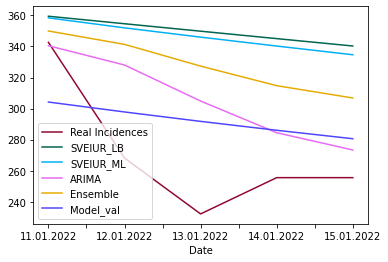

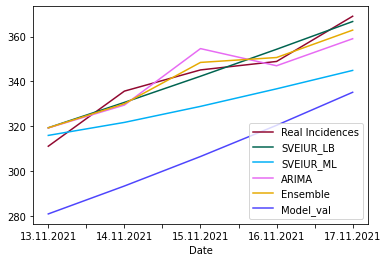

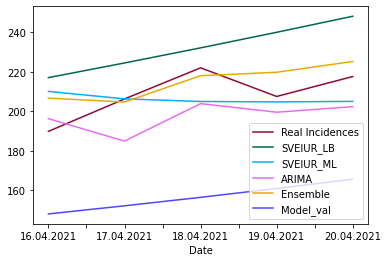

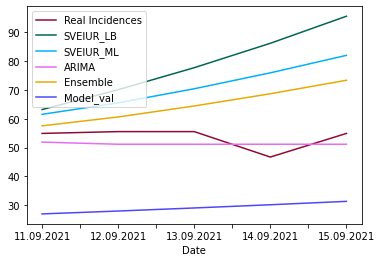

In [18]:
colors = ('#910830', '#006450', '#00B0F6', '#E76BF3', '#E6AB02', '#4E45FD')
date1.plot(x='Date', kind='line', color=colors)
plt.savefig(f'{cur_distr}_date1_cases_line.png')
date2.plot(x='Date', kind='line', color=colors)
plt.savefig(f'{cur_distr}_date2_cases_.png')
date3.plot(x='Date', kind='line', color=colors)
plt.savefig(f'{cur_distr}_date3_cases_line.png')
date4.plot(x='Date', kind='line', color=colors)plt.savefig(f'{cur_distr}_date4_cases_line.png')

### Plot average MAPE

In [3]:
comparison_long = pd.read_csv('../../Assets/Data/Evaluation/Cross_Validity_Comparison_long_adapted.csv', index_col=0)
comparison_long

,Date,Real Incidences,SVEIUR_LB,SVEIUR_ML,ARIMA,Ensemble,Model_val
District,,,,,,,
Anhalt-Bitterfeld,11.01.2022,342.617013,359.438714,358.391580,340.462061,349.950387,304.205034
Anhalt-Bitterfeld,12.01.2022,268.162487,354.613762,351.961938,328.051165,341.332463,297.821756
Anhalt-Bitterfeld,13.01.2022,232.197166,349.813492,345.990139,304.871494,327.342493,291.770010
Anhalt-Bitterfeld,14.01.2022,255.543076,345.037316,340.255317,284.458257,314.747787,286.034873
Anhalt-Bitterfeld,15.01.2022,255.543076,340.285368,334.657619,273.365352,306.825360,280.602320
...,...,...,...,...,...,...,...
Muehldorf a.Inn,16.12.2021,445.318973,467.348377,478.940026,445.087119,463.080534,434.515226
Muehldorf a.Inn,17.12.2021,404.756973,444.221308,472.939202,402.370160,438.968007,415.154093
Muehldorf a.Inn,18.12.2021,363.331952,422.199695,462.494053,364.298970,415.157148,396.826731


#### Create MAPE

In [4]:
df_v5 = abs(comparison_long[['SVEIUR_LB','SVEIUR_ML', 'ARIMA', 'Ensemble', 'Model_val']].multiply(1/comparison_long['Real Incidences'], axis='index')-1)
df_v5['Dates'] = comparison_long['Date']
df_v5

,SVEIUR_LB,SVEIUR_ML,ARIMA,Ensemble,Model_val,Dates
District,,,,,,
Anhalt-Bitterfeld,0.049098,0.046041,0.006290,0.021404,0.112113,11.01.2022
Anhalt-Bitterfeld,0.322384,0.312495,0.223330,0.272857,0.110602,12.01.2022
Anhalt-Bitterfeld,0.506536,0.490070,0.312985,0.409761,0.256561,13.01.2022
Anhalt-Bitterfeld,0.350212,0.331499,0.113152,0.231682,0.119322,14.01.2022
Anhalt-Bitterfeld,0.331616,0.309594,0.069743,0.200680,0.098063,15.01.2022
...,...,...,...,...,...,...
Muehldorf a.Inn,0.049469,0.075499,0.000521,0.039885,0.024261,16.12.2021
Muehldorf a.Inn,0.097501,0.168452,0.005897,0.084522,0.025687,17.12.2021
Muehldorf a.Inn,0.162022,0.272924,0.002662,0.142639,0.092188,18.12.2021


#### Create quantile

In [5]:
sveiur_LB_qunatile = np.quantile(df_v5['SVEIUR_LB'], 0.5)
sveiur_ML_qunatile = np.quantile(df_v5['SVEIUR_ML'], 0.5)
arima_quantile = np.quantile(df_v5['ARIMA'], 0.5)
ensemlbe_quntile = np.quantile(df_v5['Ensemble'], 0.5)
model_val_qunatile = np.quantile(df_v5['Model_val'], 0.5)
sveiur_LB_qunatile, sveiur_ML_qunatile, arima_quantile, ensemlbe_quntile, model_val_qunatile
models = ['SVEIUR_LB', 'SVEIUR_ML', 'ARIMA', 'Ensemlbe', 'Model_val']
mape = [sveiur_LB_qunatile, sveiur_ML_qunatile, arima_quantile, ensemlbe_quntile, model_val_qunatile]
average_df = pd.DataFrame()
average_df['model'] = models
average_df['average mape'] = mape
average_df

,model,average mape
0,SVEIUR_LB,0.129780
1,SVEIUR_ML,0.114673
2,ARIMA,0.075018
3,Ensemlbe,0.097288
4,Model_val,0.257746


#### Plot average mape

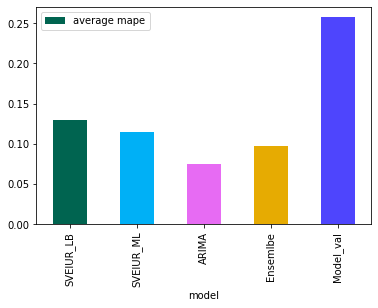

In [7]:
colors = ('#006450', '#00B0F6', '#E76BF3', '#E6AB02', '#4E45FD', '#910830')
average_df.plot(x='model', y='average mape', kind='bar', color=colors, legend='average mape')
plt.savefig(f'cross_validity_mape_average.png')

# Predictive Validity Plots

### Load data

In [47]:
df_twitter = pd.read_csv('../../Assets/Data/Evaluation/twitter.csv', index_col=0)
df_twitter

,district,ARIMA,SVEIUR,Real Data
0,Muenster,344.691344,343.504146,541.714286
1,Potsdam,517.411733,527.180566,424.714286
2,Segeberg,650.349530,704.890519,358.285714
3,"Rosenheim, Kreis",611.219656,802.444036,680.428571
4,Hochtaunus,743.564286,990.716187,456.571429
5,Dortmund,1220.391669,1279.499641,1551.857143
6,Essen,1195.227814,1073.333988,999.285714
7,Bielefeld,653.892720,415.815857,284.428571
8,Warendorf,238.964241,276.854373,445.571429


### Plot MAPE

In [48]:
twitter_mape = df_v5 = abs(df_twitter[['ARIMA', 'SVEIUR']].multiply(1/df_twitter['Real Data'], axis='index')-1)
twitter_mape['district'] = df_twitter['district']
twitter_mape

,ARIMA,SVEIUR,district
0,0.363703,0.365894,Muenster
1,0.218258,0.241259,Potsdam
2,0.815170,0.967398,Segeberg
3,0.101714,0.179321,"Rosenheim, Kreis"
4,0.628583,1.169904,Hochtaunus
5,0.213593,0.175504,Dortmund
6,0.196082,0.074101,Essen
7,1.298970,0.461934,Bielefeld
8,0.463690,0.378653,Warendorf


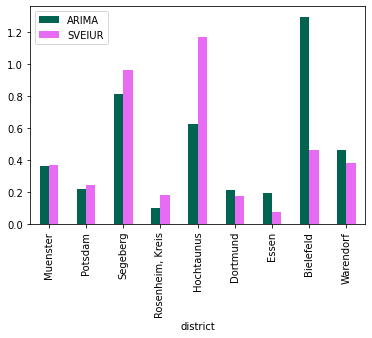

In [49]:
colors = ('#006450', '#E76BF3')
twitter_mape.plot(x='district', kind='bar', color=colors)
plt.savefig('twitter.png')

### Plot cases

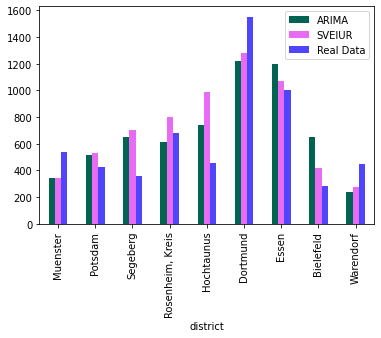

In [51]:
colors = ('#006450', '#E76BF3', '#4E45FD')
df_twitter.plot(x='district', kind='bar', color=colors)
plt.savefig('twitter_abs.png')